In [3]:
import torch
from torch import nn
import tools as tl

In [4]:
batch_size = 256
train_iter, test_iter = tl.load_data_fashion_mnist(batch_size)

In [5]:
num_inputs, num_outputs, num_hidden = 784, 10, 256

W1 = nn.Parameter(torch.randn(num_inputs, num_hidden, requires_grad=True) * 0.01)
b1 = nn.Parameter(torch.zeros(num_hidden, requires_grad=True))
W2 = nn.Parameter(torch.randn(num_hidden, num_outputs, requires_grad=True) * 0.01)
b2 = nn.Parameter(torch.zeros(num_outputs, requires_grad=True))

params = [W1, b1, W2, b2]

In [6]:
def relu(X):
    a = torch.zeros_like(X)
    return torch.max(X, a)

In [7]:
def net(X):
    X = X.reshape((-1, num_inputs))
    H = relu(X @ W1 + b1)
    return (H @ W2 + b2)

In [8]:
loss = nn.CrossEntropyLoss(reduction='none')

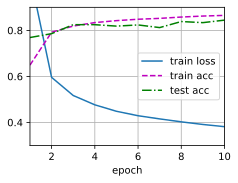

In [9]:
num_epochs, lr = 10, 0.1
updater = torch.optim.SGD(params, lr=lr)

tl.train_ch3(net, train_iter, test_iter, loss, num_epochs, updater)

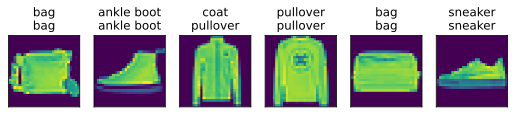

In [10]:
tl.predict_ch3(net, test_iter)